Cargando MNIST...
===== AdaBoost =====
Accuracy: 0.6277


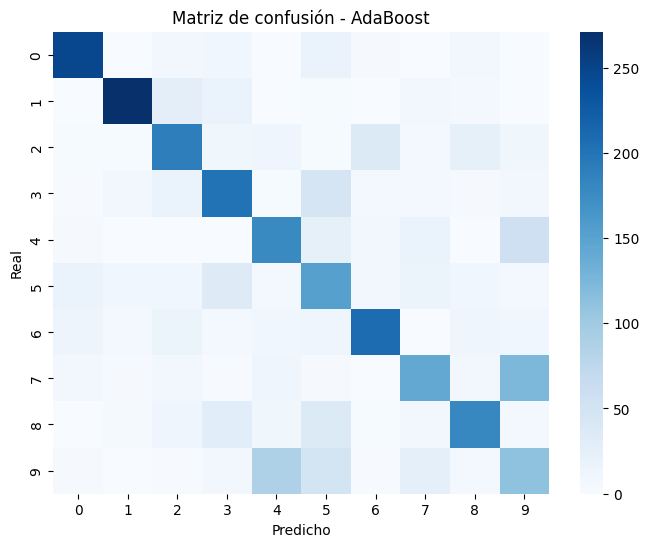

===== GradientBoosting =====


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# ==========================
# Cargar MNIST
# ==========================
print("Cargando MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data / 255.0
y = mnist.target.astype(int)

# Para que no tarde años, reducimos dataset
X, _, y, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=42)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ==========================
# Definir clasificadores
# ==========================
classifiers = {
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# ==========================
# Entrenar y evaluar
# ==========================
results = {}

for name, clf in classifiers.items():
    print(f"===== {name} =====")
    
    # Entrenar
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred = clf.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"Matriz de confusión - {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# ==========================
# Resultados finales
# ==========================
print("Resultados de Accuracy:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")
